<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/neuro/NeuroIA/sentiment.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
    <div align="center"> Recordá abrir en una nueva pestaña </div>
    

# Ejemplo Clasificación de Opiniones

Vamos a ver un ejemplo sencillo de clasificación de texto, haciendo un sentiment análisis de frases o positivas o negativas.

Para esto usamos la librería sklearn, con el método TF-IDF y un clasificador Naïve Bayes.

In [ ]:
!wget https://datasets-humai.s3.amazonaws.com/datasets/sentiment.csv

--2020-11-10 20:10:37--  https://datasets-humai.s3.amazonaws.com/datasets/sentiment.csv
Resolving datasets-humai.s3.amazonaws.com (datasets-humai.s3.amazonaws.com)... 52.216.108.67
Connecting to datasets-humai.s3.amazonaws.com (datasets-humai.s3.amazonaws.com)|52.216.108.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125932 (123K) [text/csv]
Saving to: ‘sentiment.csv’

sentiment.csv       100%[===================>] 122.98K   604KB/s    in 0.2s    

2020-11-10 20:10:37 (604 KB/s) - ‘sentiment.csv’ saved [125932/125932]



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sentiment.csv')

In [ ]:
df.head()

,Sentiment,Phrase
0,NEGATIVE,Muy aburrida la clase siempre con presentacion...
1,NEGATIVE,La clase es tediosa y el profesor no sabe como...
2,NEGATIVE,Las clases son muy tediosas ya que solo usa di...
3,NEGATIVE,El profesor es decepcionante y forma de evalua...
4,POSITIVE,Es una buena persona y su desempeño en clase e...


In [ ]:
df['Sentiment'].value_counts()

POSITIVE    941
NEGATIVE    743
Name: Sentiment, dtype: int64

In [ ]:
train,test = train_test_split(df, test_size=0.33)

In [ ]:
# Separamos en X e y
train_y = train.iloc[:,0]
train_X = train.iloc[:,1]
test_y = test.iloc[:,0]
test_X = test.iloc[:,1]

In [ ]:
# Vectorizamos los textos por TF-IDF
vec = TfidfVectorizer(min_df=3)
model = MultinomialNB()
clf = make_pipeline(vec,model)
clf = clf.fit(train_X, train_y)

In [ ]:
test_X

1605       Tener un planteamiento mejor genera confusion 
1027                el profesor no respeta hora de salida
782     NO CONTESTA DE UNA BUENA FORMA Y ES MUY IMPACI...
642     Identifico mucho compromiso y gusto por la doc...
570     LA PROFESORA ES MUY PACIENTE CON NOSOTROS, ES ...
                              ...                        
57      Estoy inconforme con su manera de evaluar ya q...
1059    la maestra toma en cuenta errores insignifican...
1400    No confió en su sonrisa a la hora de los exame...
1315    Es muy llevadito, es irrespetuoso con la mayor...
1220    No me gusta su clase además ella solo deja tra...
Name: Phrase, Length: 556, dtype: object

In [ ]:
predictions = clf.predict(test_X)

In [ ]:
accuracy_score(test_y,predictions)

0.8453237410071942

In [ ]:
df_cm = confusion_matrix(test_y,predictions,labels=test_y.unique())

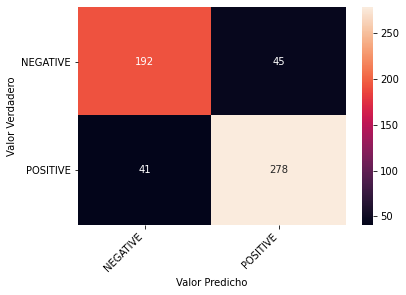

In [ ]:
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(test_y.unique(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(test_y.unique(), rotation=45, ha='right')
plt.ylabel('Valor Verdadero')
plt.xlabel('Valor Predicho');

In [ ]:
clf.predict(['Esta clase está genial, aguante el machine learning'])

array(['POSITIVE'], dtype='<U8')

In [ ]:
clf.predict(['Uf qué cagada, voy a tener que estudiar matemáticas'])

array(['NEGATIVE'], dtype='<U8')

¿Qué usos de aplicación se les ocurren para algoritmos similares?